<a href="https://colab.research.google.com/github/girlandred/data-engineering/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cufflinks as cf
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools
import seaborn as sns
import chart_studio.plotly as py

In [ ]:
df = pd.read_csv('/content/2019 (1).csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



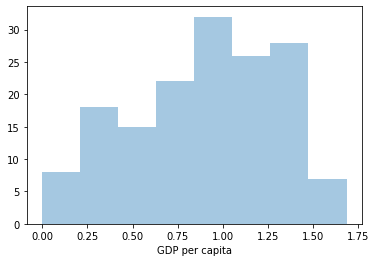

In [ ]:
sns.distplot(df['GDP per capita'], kde=False, bins=8)

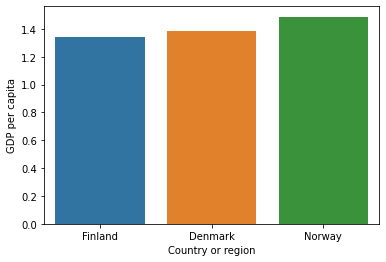

In [ ]:
sns.barplot(x=df['Country or region'].head(3), y=df['GDP per capita'], data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f869ac88310>,
      dtype=object)

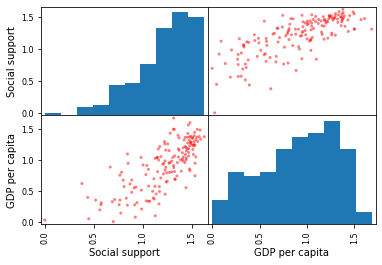

In [ ]:
pd.plotting.scatter_matrix(df[['Social support', 'GDP per capita']], color='red')

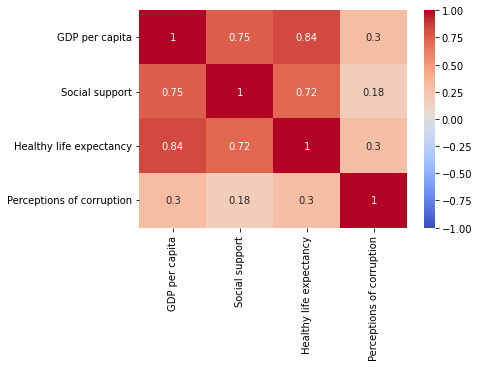

In [ ]:
data_select = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Perceptions of corruption']]
data_select.corr()
sns.heatmap(data_select.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

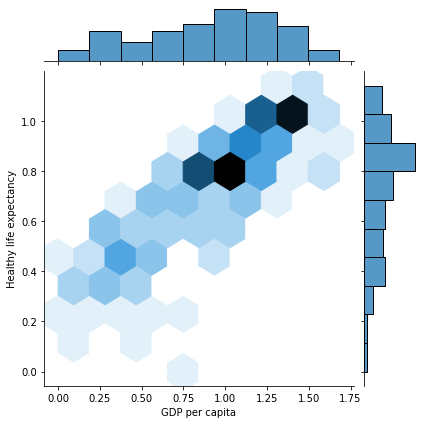

In [ ]:
sns.jointplot(x=df['GDP per capita'], y=df['Healthy life expectancy'], data=df, kind='hex')

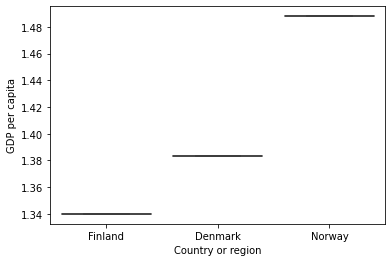

In [ ]:
sns.boxplot(x=df['Country or region'].head(3), y=df['GDP per capita'], data=df)

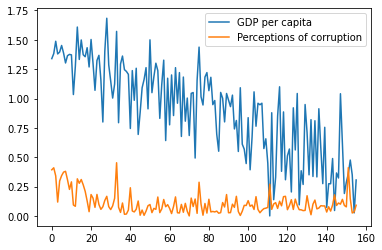

In [ ]:
data= df[['Perceptions of corruption', 'GDP per capita']]
plt.plot(df['GDP per capita'], label="GDP per capita")
plt.plot(df['Perceptions of corruption'], label="Perceptions of corruption")
plt.plot()
plt.legend()
plt.show()

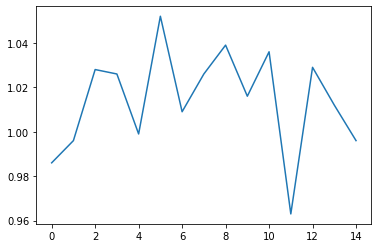

In [ ]:
plt.plot(df['Healthy life expectancy'].head(15))

In [ ]:
df['General rank'] = df['Overall rank'].apply(lambda x:str(int(x/50) * 50) + ' - ' +str(int(x/50) * 50 + 50))
fig = px.violin(df, y='Freedom to make life choices', x='General rank', box=True)
fig.show()

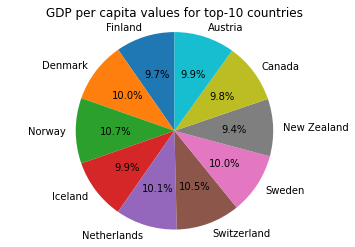

In [ ]:
labels = df['Country or region'].head(10).value_counts().index
values = df['GDP per capita'].head(10).values
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')
plt.title('GDP per capita values for top-10 countries')
plt.show()